In [1]:
%matplotlib inline
from astropy.io import fits
from astropy.table import Table
from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt
from matplotlib.colors import SymLogNorm, Normalize
import numpy as np

In [4]:
ref = Table.read('/home/aalvarez/Work/Projects/SourceXtractor-litmus/data/sim11/ref/sim11_r_01_reference.fits')
target = Table.read('/tmp/sourcex/x86_64-fc31-gcc93-dbg/test_single_frame.py/output.fits')

In [7]:
img = fits.open('/home/aalvarez/Work/Projects/SourceXtractor-litmus/data/sim11/img/sim11_r_01.fits.gz')[0]
bg = fits.open('/tmp/sourcex/x86_64-fc31-gcc93-dbg/test_single_frame.py/check_background.fits')[0]
flux_scale = img.header['FLXSCALE']

In [8]:
img.data *= flux_scale
img.data -= bg.data

In [9]:
target['world_centroid_alpha'].unit = None
target['world_centroid_delta'].unit = None

In [10]:
ref_coords = SkyCoord(ref['ALPHA_SKY'], ref['DELTA_SKY'])
target_coords = SkyCoord(target['world_centroid_alpha'], target['world_centroid_delta'], unit='deg')

In [11]:
idx_target, _, _ = ref_coords.match_to_catalog_sky(target_coords)

In [18]:
def plot_vignettes(idx, axes):
    se2 = ref[idx]
    sepp = target[idx_target[idx]]
    
    se2_vignet = se2['VIGNET'] * flux_scale
    sepp_vignette = sepp['vignet']

    # Apply nanmask
    se2_vignet[se2_vignet<-1e29] = np.nan
    sepp_vignette[sepp_vignette<-1e29] = np.nan
    
    w, h = se2_vignet.shape[0], se2_vignet.shape[1]

    norm = SymLogNorm(100)
    
    axes[0].imshow(se2_vignet, norm=norm)
    axes[0].axhline(w//2, 0, h, c='black')
    axes[0].axvline(h//2, 0, w, c='black')
    axes[1].imshow(sepp_vignette, norm=norm)
    axes[1].axhline(w//2, 0, h, c='black')
    axes[1].axvline(h//2, 0, w, c='black')
    
    axes[0].set_title(f'SE2 ({se2["X_IMAGE"]:.2f} {se2["Y_IMAGE"]:.2f})')
    axes[1].set_title(f'SE++ ({sepp["pixel_centroid_x"]:.2f} {sepp["pixel_centroid_y"]:.2f})')
    
    #i = axes[2].imshow(se2_vignet - sepp_vignette)
    #plt.colorbar(i, ax=axes[2])

In [19]:
ref_indexes = [137, 18, 55, 78, 92, 97 ,126, 143, 166, 27]

/home/aalvarez/miniconda3/envs/phz/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in less
  # Remove the CWD from sys.path while we load stuff.


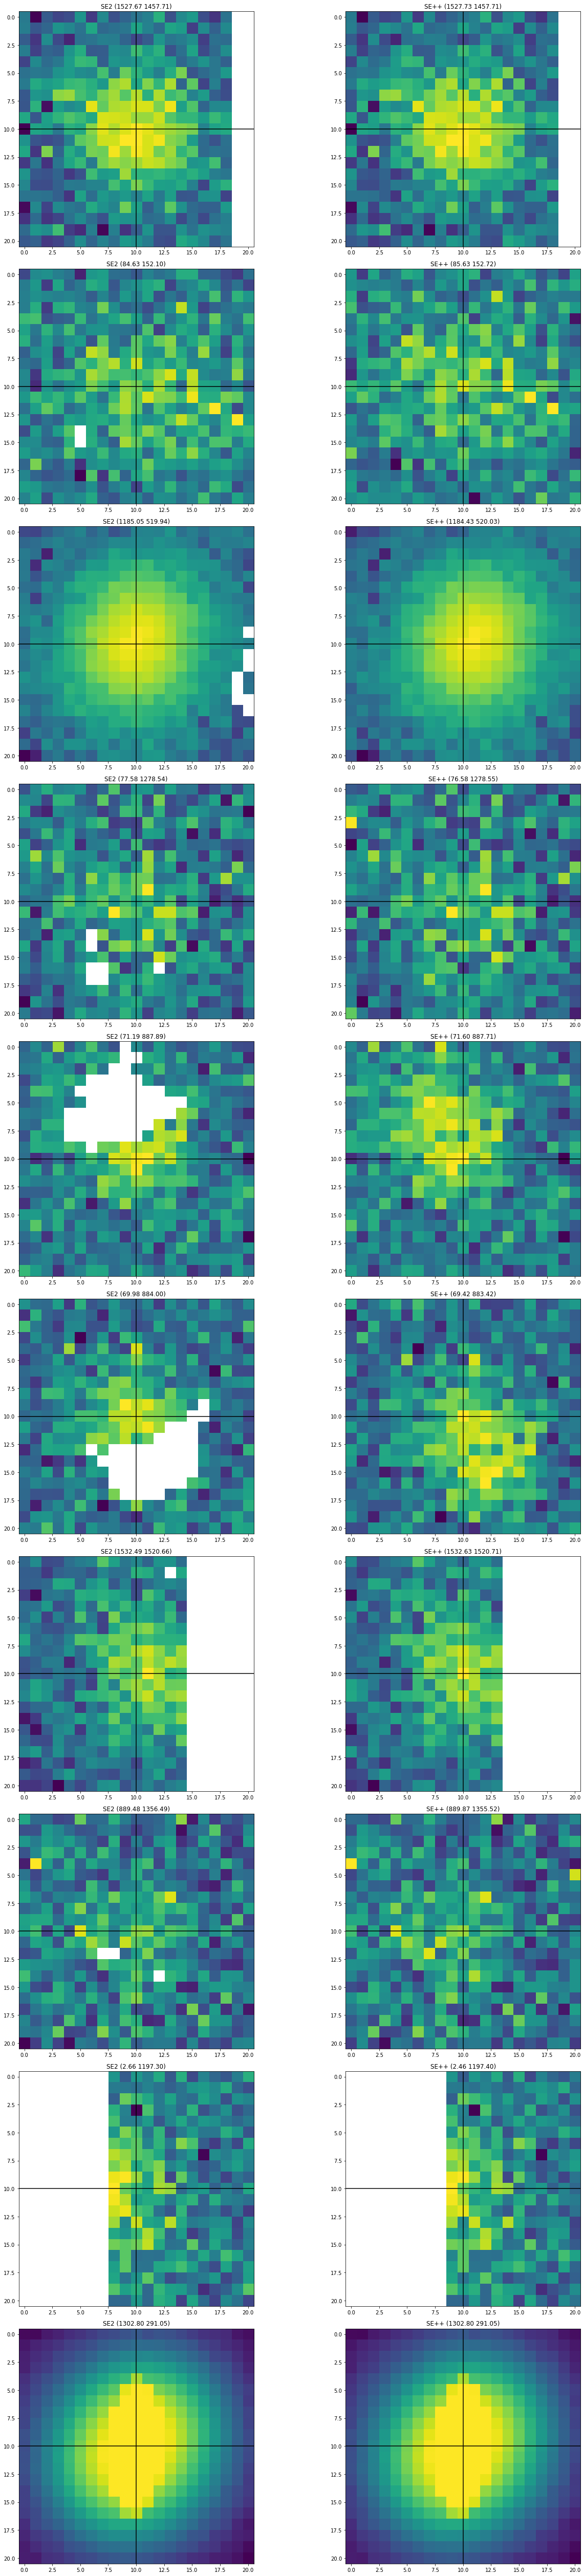

In [20]:
fig, axes = plt.subplots(nrows=len(ref_indexes), ncols=2, figsize=(20, 7*len(ref_indexes)))

for i, idx in enumerate(ref_indexes):
    plot_vignettes(idx, axes[i,:])
    
plt.tight_layout()
plt.show()